<a href="https://colab.research.google.com/github/Dysteiq/ST1-Capstone-Project/blob/main/ST1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Initialisation
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import cv2
from google.colab.patches import cv2_imshow
import random
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
#@title Check GPU
!nvidia-smi

Tue Oct 24 06:33:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Please enter the number of images: 1
Cheetahs


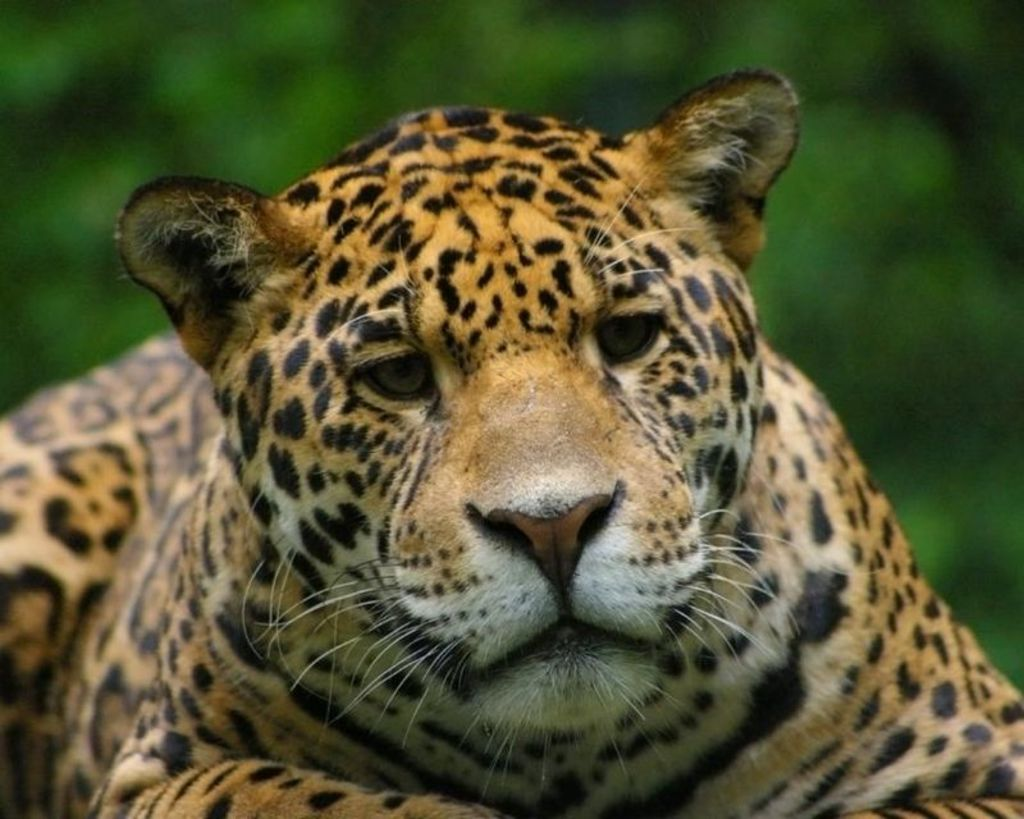


Lions


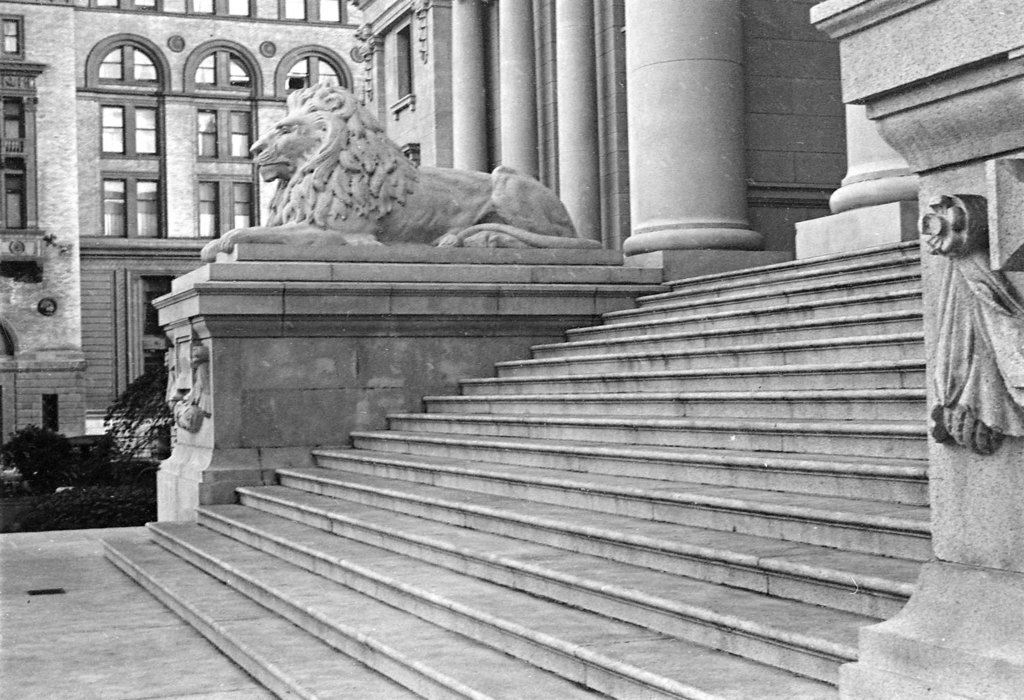

In [5]:
# @title Choose a Sample of Images
#EDA Step 1: Data Collection. Goal: Display a specified number of random images from each dataset
import os
import cv2
from google.colab.patches import cv2_imshow
import random

cheetah_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Cheetahs/'
cheetah_all_files = os.listdir(cheetah_dir)

lion_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Lions/'
lion_all_files = os.listdir(lion_dir)

cheetah_chosen_set = []
lion_chosen_set = []

def get_random_images(number_of_images):
  if number_of_images > len(cheetah_all_files) or number_of_images > len(lion_all_files):
    print("The number of images requested is greater than the available images.")
    return []

  cheetah_files = random.sample(cheetah_all_files, number_of_images)
  lion_files = random.sample(lion_all_files, number_of_images)

  for file in cheetah_files:
    img = cv2.imread(os.path.join(cheetah_dir, file))
    cheetah_chosen_set.append(img)

  for file in lion_files:
    img = cv2.imread(os.path.join(lion_dir, file))
    lion_chosen_set.append(img)


def display_images(cheetah_chosen_set, lion_chosen_set):   #Display the training images
  print("Cheetahs")
  for img in cheetah_chosen_set:
    cv2_imshow(img)

  print("\nLions")
  for img in lion_chosen_set:
    cv2_imshow(img)

def main():
  number_of_images = None
  try:
    number_of_images = int(input("Please enter the number of images: "))
  except ValueError:
    print("Invalid input, please enter a valid integer.")
    return None

  if number_of_images is not None:
    get_random_images(number_of_images)
    display_images(cheetah_chosen_set, lion_chosen_set)



if __name__ == '__main__':
    main()

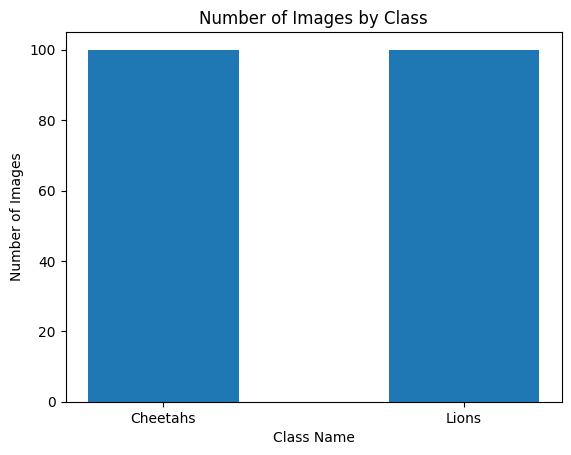

In [ ]:
# @title Number of Images Analysis
#EDA Step 1: Data Collection. Goal: Graph the number of images
import os
import matplotlib.pyplot as plt

cheetah_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Cheetahs/'
cheetah_all_files = os.listdir(cheetah_dir)

lion_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Lions/'
lion_all_files = os.listdir(lion_dir)

def main():
  classes = {'Cheetahs': len(cheetah_all_files),
  'Lions': len(lion_all_files)}

  plt.bar(classes.keys(), classes.values(), width = .5);
  plt.title("Number of Images by Class");
  plt.xlabel('Class Name');
  plt.ylabel('Number of Images');



if __name__ == '__main__':
    main()

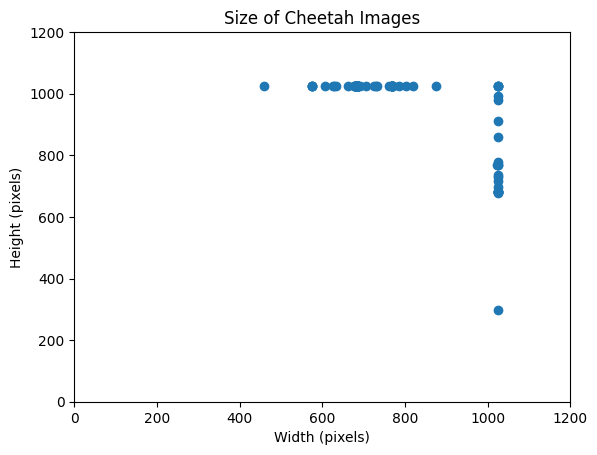

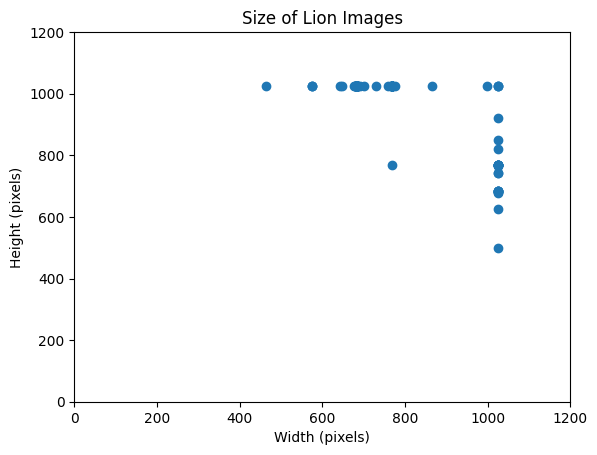

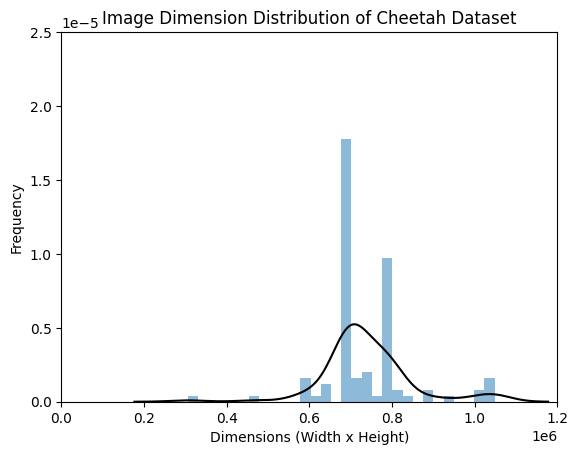

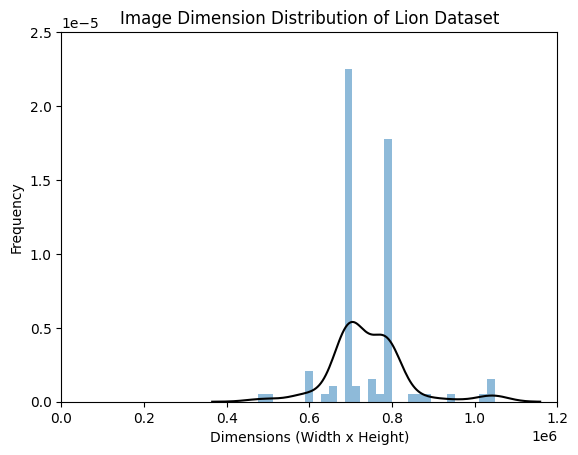

In [ ]:
# @title Dimensions Analysis
#EDA Step 2: Variables. Goal: Display the sizes (width x height) on a graph
import os
import matplotlib.pyplot as plt
import seaborn as sns

cheetah_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Cheetahs/'
cheetah_all_files = os.listdir(cheetah_dir)

lion_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Lions/'
lion_all_files = os.listdir(lion_dir)

cheetah_widths = []  # Initialize lists to store width values for cheetahs
cheetah_heights = []  # Initialize lists to store height values for cheetahs
cheetah_dimensions = [] # Initialize lists to store dimension values for cheetah
lion_widths = []  # Initialize lists to store width values for lions
lion_heights = []  # Initialize lists to store height values for lions
lion_dimensions = []  # Initialize lists to store dimension values for lions

def get_dimensions(directory, img_list):
  widths = []
  heights = []
  dimensions = []
  for img in img_list:
    img = cv2.imread(os.path.join(directory, img))
    if img is not None:
      width, height, _ = img.shape
      widths.append(width)
      heights.append(height)
      dimensions.append(width*height)
  return widths, heights, dimensions

def main():
  cheetah_widths, cheetah_heights, cheetah_dimensions = get_dimensions(cheetah_dir, cheetah_all_files)
  lion_widths, lion_heights, lion_dimensions = get_dimensions(lion_dir, lion_all_files)

  plt.scatter(cheetah_widths, cheetah_heights);
  plt.title("Size of Cheetah Images");
  plt.xlabel('Width (pixels)');
  plt.ylabel('Height (pixels)');
  plt.xlim(0, 1200)  # Adjust the range as needed
  plt.ylim(0, 1200)
  plt.show()

  plt.scatter(lion_widths, lion_heights);
  plt.title("Size of Lion Images");
  plt.xlabel('Width (pixels)');
  plt.ylabel('Height (pixels)');
  plt.xlim(0, 1200)  # Adjust the range as needed
  plt.ylim(0, 1200)
  plt.show()

  plt.hist(cheetah_dimensions, bins=30, alpha=0.5, density=True)
  plt.title("Image Dimension Distribution of Cheetah Dataset")
  plt.xlabel("Dimensions (Width x Height)")
  plt.ylabel("Frequency")
  plt.xlim(0, 1200000)
  plt.ylim(0, 0.000025)
  sns.kdeplot(cheetah_dimensions, label='Smoothed Curve', color='black')
  plt.show()

  plt.hist(lion_dimensions, bins=30, alpha=0.5, density=True)
  plt.title("Image Dimension Distribution of Lion Dataset")
  plt.xlabel("Dimensions (Width x Height)")
  plt.ylabel("Frequency")
  plt.xlim(0, 1200000)
  plt.ylim(0, 0.000025)
  sns.kdeplot(lion_dimensions, label='Smoothed Curve', color='black')
  plt.show()

if __name__ == '__main__':
    main()

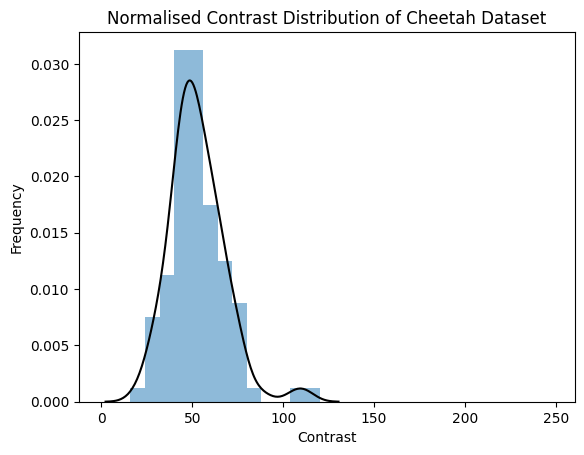

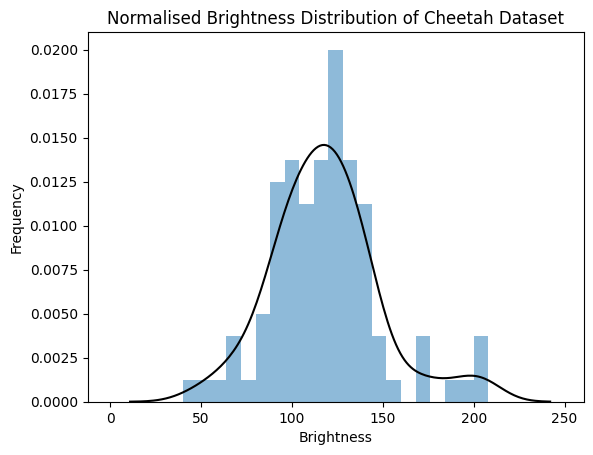

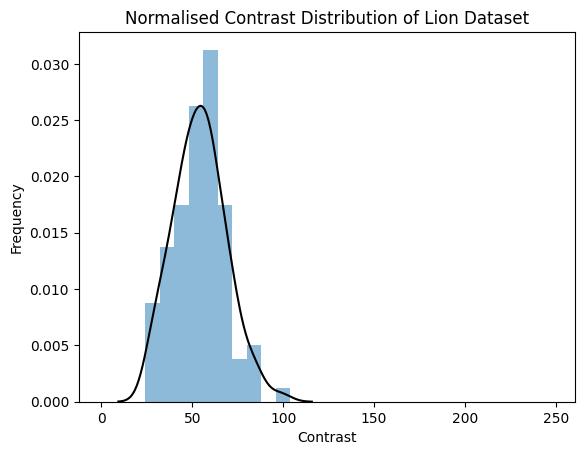

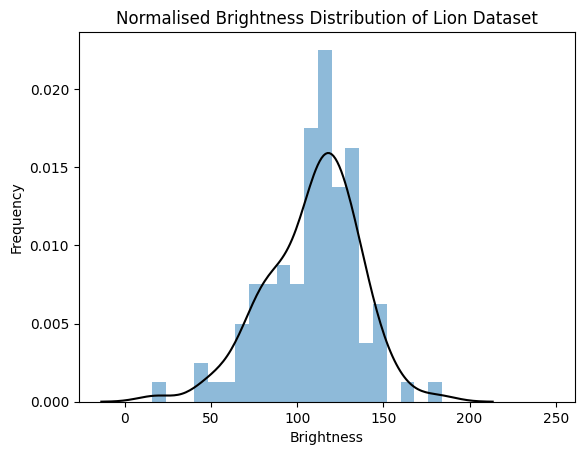

In [ ]:
# @title Contrast and Brightness Analysis
#EDA Step 2: Variables. Goal: Display the contrast and brightness in a histogram
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cheetah_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Cheetahs/'
cheetah_all_files = os.listdir(cheetah_dir)

lion_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Lions/'
lion_all_files = os.listdir(lion_dir)


target_size = (256, 256)


def get_img_stats(directory, img_list, target_size):
    contrasts = []
    brightnesses = []
    for img in img_list:
      img = cv2.imread(os.path.join(directory, img))
      if img is not None:
        img = cv2.resize(img, target_size)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        contrast = img_gray.std()
        brightness = cv2.mean(img_gray)[0]
        contrasts.append(contrast)
        brightnesses.append(brightness)
    return contrasts, brightnesses

    raise FileNotFoundError(f"Failed to read {img_list} image: {img}")

def histogram(img_data, graph_type, dataset):
  colour_bins = np.arange(0, 256, 8)

  plt.hist(img_data, colour_bins, alpha=0.5, density=True)
  plt.title(f"Normalised {graph_type} Distribution of {dataset} Dataset")
  plt.xlabel(graph_type)
  plt.ylabel("Frequency")
  sns.kdeplot(img_data, label='Smoothed Curve', color='black')
  plt.show()

def main():
  cheetah_contrasts, cheetah_brightnesses = get_img_stats(cheetah_dir, cheetah_all_files, target_size)
  lion_contrasts, lion_brightnesses = get_img_stats(lion_dir, lion_all_files, target_size)

  histogram(cheetah_contrasts, 'Contrast', 'Cheetah')
  histogram(cheetah_brightnesses, 'Brightness', 'Cheetah')
  histogram(lion_contrasts, 'Contrast', 'Lion')
  histogram(lion_brightnesses, 'Brightness', 'Lion')

if __name__ == '__main__':
    main()

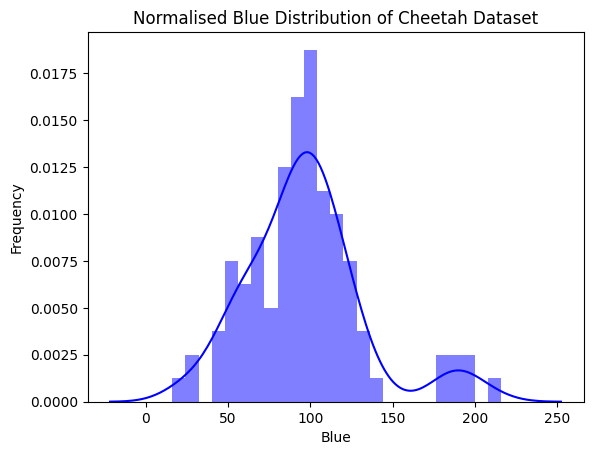

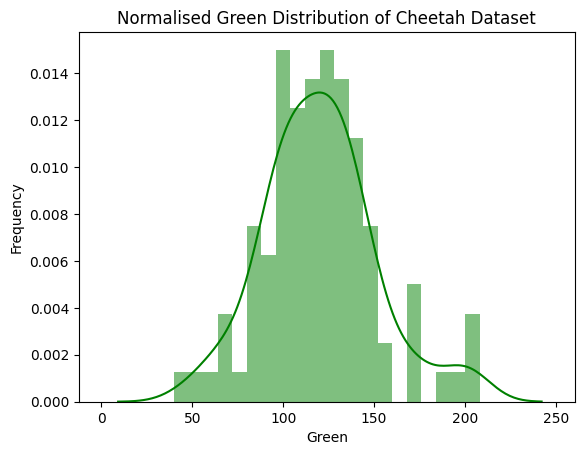

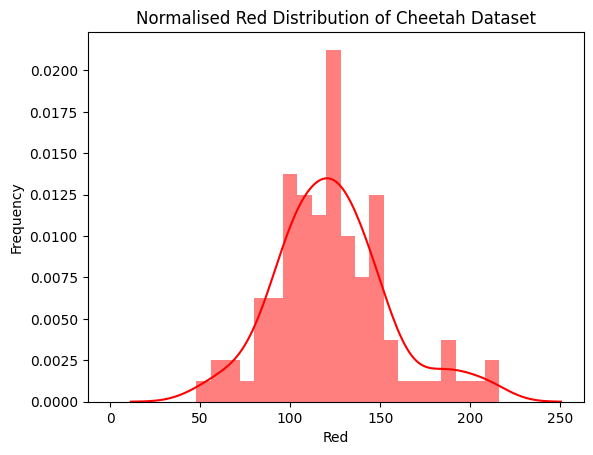

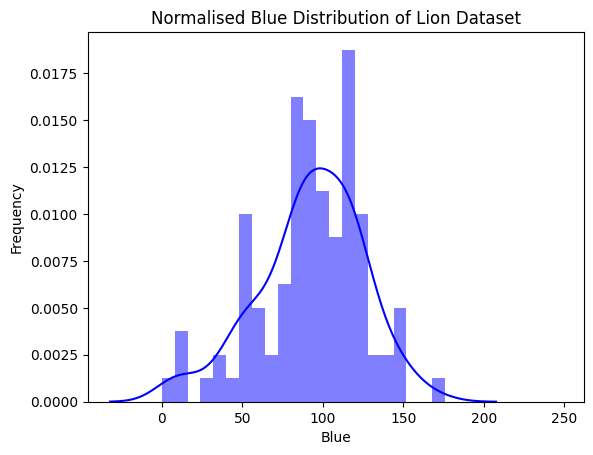

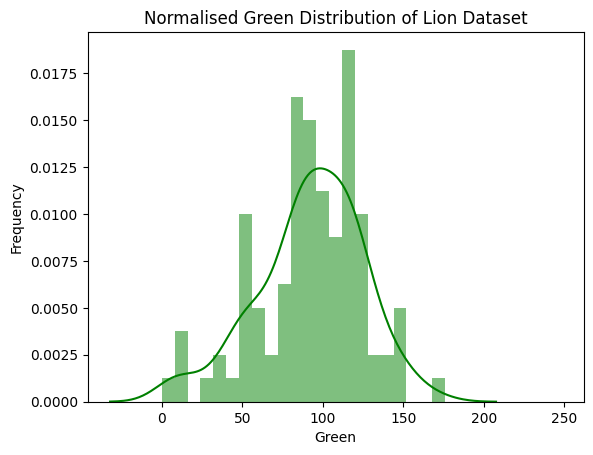

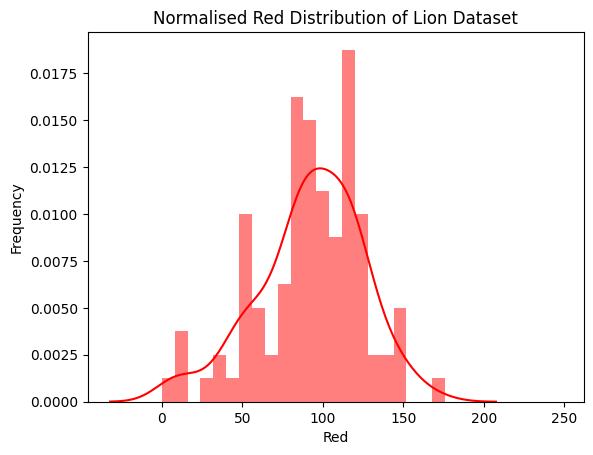

In [ ]:
# @title Colour Distribution Anaylsis via Histograms
#EDA Step 2: Variables. Goal: Display the Red, Green, Blue values in a histogram
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


cheetah_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Cheetahs/'
cheetah_all_files = os.listdir(cheetah_dir)

lion_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Lions/'
lion_all_files = os.listdir(lion_dir)

target_size = (256, 256)


def get_colour_stats(directory, img_list, target_size):
    blues = []
    greens =[]
    reds = []
    for img in img_list:
      img = cv2.imread(os.path.join(directory, img))
      if img is not None:
        img = cv2.resize(img, target_size)
        blue, green, red = cv2.split(img)
        mean_blue = np.mean(blue)
        mean_green = np.mean(green)
        mean_red = np.mean(red)
        blues.append(mean_blue)
        greens.append(mean_green)
        reds.append(mean_red)
    return blues, greens, reds

    raise FileNotFoundError(f"Failed to read {img_list} image: {img}")

def histogram(colour_data, graph_colour, dataset):
  colour_bins = np.arange(0, 256, 8)
  lower_colour = graph_colour.lower()

  plt.hist(colour_data, colour_bins, color=lower_colour, alpha=0.5, density=True)
  plt.title(f"Normalised {graph_colour} Distribution of {dataset} Dataset")
  plt.xlabel(graph_colour)
  plt.ylabel("Frequency")
  sns.kdeplot(colour_data, color=lower_colour, label='Smoothed Curve')
  plt.show()

def main():
  cheetah_blues, cheetah_greens, cheetah_reds = get_colour_stats(cheetah_dir, cheetah_all_files, target_size)
  lion_blues, lion_greens, lion_reds = get_colour_stats(lion_dir, lion_all_files, target_size)

  histogram(cheetah_blues, 'Blue', 'Cheetah')
  histogram(cheetah_greens, 'Green', 'Cheetah')
  histogram(cheetah_reds, 'Red', 'Cheetah')
  histogram(lion_blues, 'Blue', 'Lion')
  histogram(lion_blues, 'Green', 'Lion')
  histogram(lion_blues, 'Red', 'Lion')


if __name__ == '__main__':
    main()

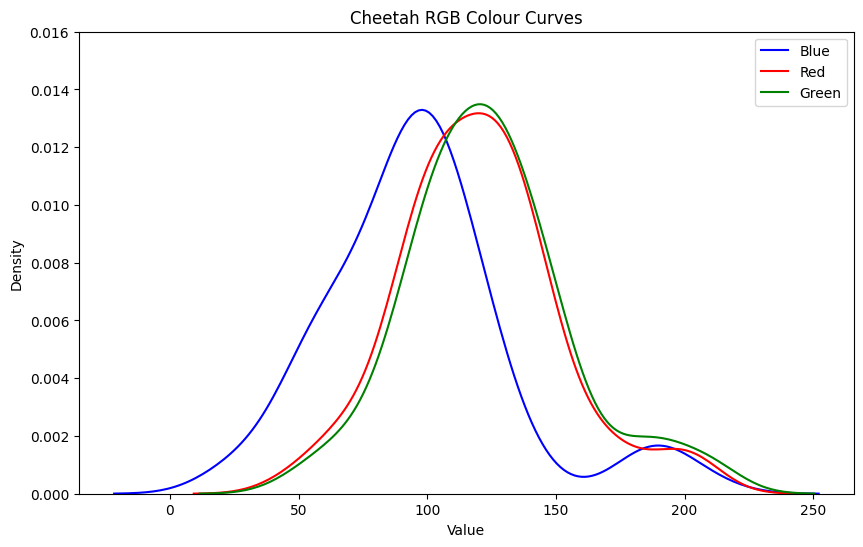

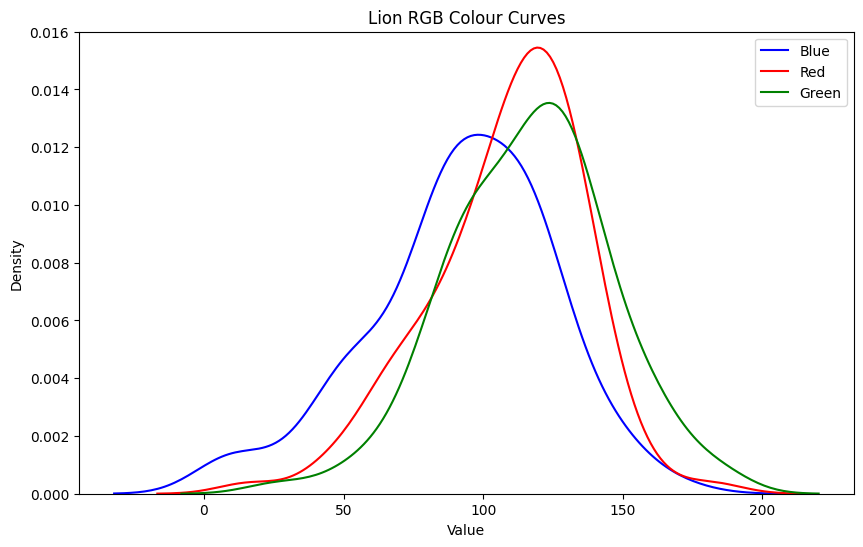

In [ ]:
#@title Average Colour Analysis (Just curves of best fit)

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cheetah_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Cheetahs/'
cheetah_all_files = os.listdir(cheetah_dir)

lion_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/Lions/'
lion_all_files = os.listdir(lion_dir)

target_size = (256, 256)

def get_colour_stats(directory, img_list, target_size):
    blues = []
    greens = []
    reds = []
    for img in img_list:
        img = cv2.imread(os.path.join(directory, img))
        if img is not None:
            img = cv2.resize(img, target_size)
            blue, green, red = cv2.split(img)
            mean_blue = np.mean(blue)
            mean_green = np.mean(green)
            mean_red = np.mean(red)
            blues.append(mean_blue)
            greens.append(mean_green)
            reds.append(mean_red)
    return blues, greens, reds

def plot_and_return_kde(curves, labels, title):
    plt.figure(figsize=(10, 6))
    for curve, label in zip(curves, labels):
        sns.kdeplot(curve, label=label, color=label.lower())
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.ylim(0,0.016)
    plt.legend()
    return plt.gcf()

def main():
    cheetah_blues, cheetah_greens, cheetah_reds = get_colour_stats(cheetah_dir, cheetah_all_files, target_size)
    lion_blues, lion_greens, lion_reds = get_colour_stats(lion_dir, lion_all_files, target_size)



    cheetah_fig = plot_and_return_kde([cheetah_blues, cheetah_greens, cheetah_reds], ['Blue', 'Red', 'Green'], 'Cheetah RGB Colour Curves')


    lion_fig = plot_and_return_kde([lion_blues, lion_greens, lion_reds], ['Blue', 'Red', 'Green'], 'Lion RGB Colour Curves')

    plt.show()

if __name__ == '__main__':
    main()


In [2]:
# @title Keras Train and Validate Model
#EDA Step : . Goal:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import numpy as np
import os
import cv2
import sys

#Paths and Model Name
training_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/training/'
validation_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/validation/'
model_name = 'my_model.h5'
model_dir = '/content/drive/MyDrive/ST1 Capstone Project Image Dataset/'
model_path = os.path.join(model_dir, model_name)


#Constants and Class Names
class_names = ['Cheetahs', 'Lions']
num_epochs = 10
batch_size = 64

#Menu Dictionary
menu_options = {
        'initialise': {
            'A': 'Train New Model (Overwrites saved model)',
            'B': 'Fine Tune Current Model',
            'C': 'Validate Current Model',
            'X': 'Exit'
        },
        'save': {
            'A': 'Save Model',
            'B': 'Discard Changes'
        },
        'overwrite': {
            'A': 'Yes, overwrite the old model',
            'B': 'No, take me back'
        }
    }

def create_new_model():
    model = keras.Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def load_existing_model():
    try:
      model = keras.models.load_model(model_path)
      print("Model successfully loaded")
    except FileNotFoundError as e:
      print(f"{e}: Could not find saved model.")
      return
    return model

def train_model(model_type):
  if model_type == 'new_model':
    model = create_new_model()
  elif model_type == 'saved_model':
    model = load_existing_model()

  train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    brightness_range=[0.2, 1.8],
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
  )

  train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    classes=class_names
  )

  model.fit(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=len(train_generator)
  )
  return model

def validate_model():
  model = load_existing_model()
  validation_datagen = ImageDataGenerator(rescale=1./255)

  validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    classes=class_names
  )

  average_loss, accuracy = model.evaluate(validation_generator)
  print(f'Average Loss: {average_loss:.4f}')
  print(f'Accuracy: {accuracy * 100:.2f}%')


def user_input(options):
    valid_options = options.keys()
    while True:
      option_description = "\n".join([f"{key}: {value}" for key, value in options.items()])
      input_value = input(f"What do you want to do:\n{option_description}\n")
      if input_value.upper() in valid_options:
        return input_value.upper()
      else:
        print("Invalid input. Please try again.")

def save_model(model): #Save model menu
  input_value = user_input(menu_options['save'])
  if input_value == 'A':
    input_value = user_input(menu_options['overwrite'])
    if input_value == 'A':
      model.save(model_path)
      print(f"The model was saved to {model_path}")
    else:
      print("No model was saved")
  elif input_value is None:
    print("No model was saved")
    return

def main(): #Top level menu
  while True:
    input_value = user_input(menu_options['initialise'])
    if input_value == 'A': #New model
      model = train_model('new_model')
      save_model(model)
    elif input_value == 'B': #Fine tune model
      model = train_model('saved_model')
      save_model(model)
    elif input_value == 'C': #Test model
      model = validate_model()
    elif input_value == 'X':
      break
    elif input_value is None:
      print("No model was saved")
      return

if __name__ == "__main__":
    main()

What do you want to do:
A: Train New Model (Overwrites saved model)
B: Fine Tune Current Model
C: Validate Current Model
X: Exit
C
Model successfully loaded
Found 80 images belonging to 2 classes.
2/2 [==============================] - 5s 4s/step - loss: 0.4714 - accuracy: 0.8125
Average Loss: 0.4714
Accuracy: 81.25%
What do you want to do:
A: Train New Model (Overwrites saved model)
B: Fine Tune Current Model
C: Validate Current Model
X: Exit
X
